# Loan Approval Prediction 
## Classification Problem

### Business Problem

A Company named Dream Housing Finance Company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are *Gender*, *Marital Status*, *Education*, *Number of Dependents*, *Income*, *Loan Amount*, *Credit History* and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

**Note**: This dataset and problem is taken from [www.Kaggle.com](https://www.kaggle.com/roshansharma/loan-prediction.)






### Step 1:Frame/set up the Problem: 
Predict if a loan will get approved or not by using classification models.  


#### Considerations:
Below are some of the factors which *can* affect the Loan Approval:

- **Income**: Applicants with high income should have more chances of loan approval.
- **Previous history**: Applicants who have repayed their previous debts should have higher chances of loan approval.
- **Loan amount**: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- **Loan term**: Loan for less time period and less amount should have higher chances of approval.
- **EMI**: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [1]:
#Install a package that will allow us to vidualize the missing data values
!pip install -q missingno
import missingno as ms
# Import neccessary packages

import numpy as np # linear algebra
import pandas as pd # data processing

#data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
 
# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# To ignore any warnings 
import warnings 
warnings.filterwarnings("ignore") 

### Step 2: Obtain the Data:
Load the dataset using pandas!



In [2]:
# Load Dataset

df_train = pd.read_csv(r"C:\Users\18326\Desktop\MachineLearning\Project_LoanPrediction\train_LoanPrediction.csv")
df_test = pd.read_csv((r"C:\Users\18326\Desktop\MachineLearning\Project_LoanPrediction\test_LoanPrediction.csv"))

# Make a copy of train and test data

df_train_original=df_train.copy() 
df_test_original=df_test.copy()


### Step 3: Analyze the Data: 
In this section, we will explore and visualize the test and train data to better understand it.

In [3]:
print("The shape of the train data is" , df_train.shape )
print("The shape of the test data is" , df_test.shape)


The shape of the train data is (614, 13)
The shape of the test data is (367, 12)


In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


####  <span style="color:blue"> Note 1: Information about columns in the datasets.</span>

- In the train dataset, there are 12 independent and 1 target variable (Loan_Status). 
- In the test dataset, there are similar features as the train dataset except the Loan_Status which we will predict using the model built with the help of the training dataset.

In [6]:
df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
df_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


####  <span style="color:blue"> Note 2: How (dis)similar are train and test datasets? .</span>

- There are 8 categorical/ordinal variables in training data and 7 categorical/ordinal variables in test dataset (since Loan_status is missing) which we will need to convert into numerical values before applying Macgine learning modeling.  independent and 1 target variable (Loan_Status). 
- There are a bunch of missing or NaN values in the datasets that we will need to take care as well. 
- Based on the basic stats information above, the distribution of the datasets seems quite similar.

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


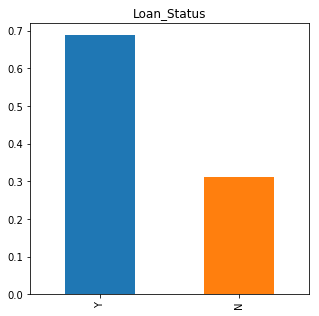

In [12]:
#Univariate Analysis
print(df_train["Loan_Status"].value_counts(normalize= True))
#Visualize target variable (categorical) in the data
df_train['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(5,5), title= 'Loan_Status') 


####  <span style="color:blue"> Note 3:</span> The loan of 422 (approximately 69%) people out of 614 was approved. 


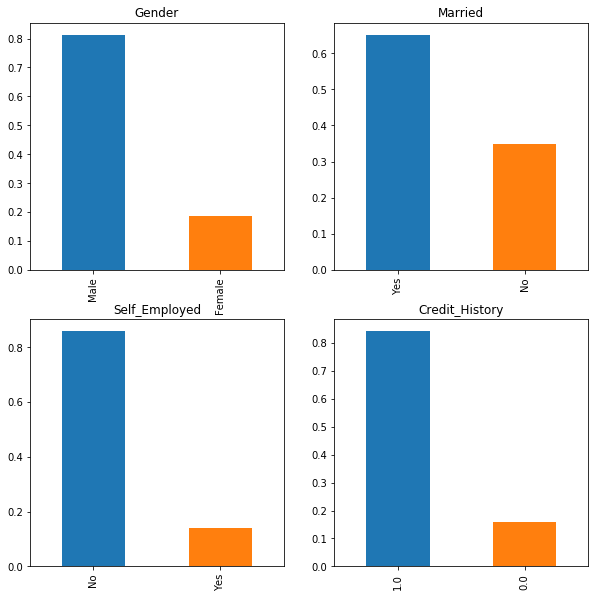

In [13]:
#Visualize categorical variables in the train data

plt.figure(1) 
plt.subplot(221) 
df_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title= 'Gender') 
plt.subplot(222)
df_train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df_train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df_train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

####  <span style="color:blue"> Note 4: Inferences from the bar plots of categorical variables. </span>

- 80% applicants in the training dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

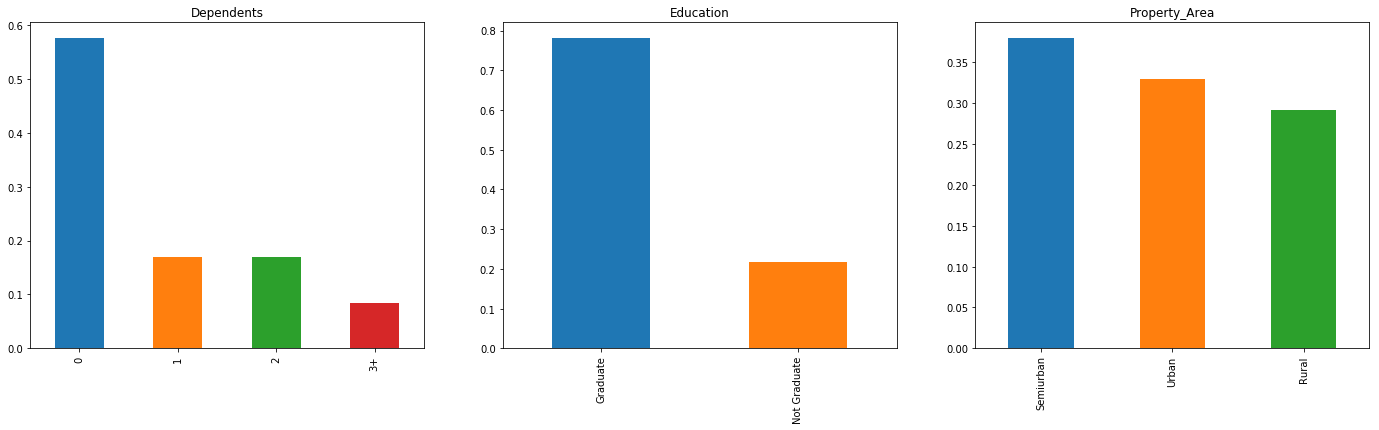

In [14]:
#Visualize ordinal variables in the train data

plt.figure(1) 
plt.subplot(131)  #Draw a subplot as a first plot in one row and 3 columns 
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)  #Draw a subplot as a second plot in one row and 3 columns 
df_train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133)   #Draw a subplot as a third plot in one row and 3 columns 
df_train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

####  <span style="color:blue"> Note 5: Inferences from the bar plots of ordinal varaibles. </span>

- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

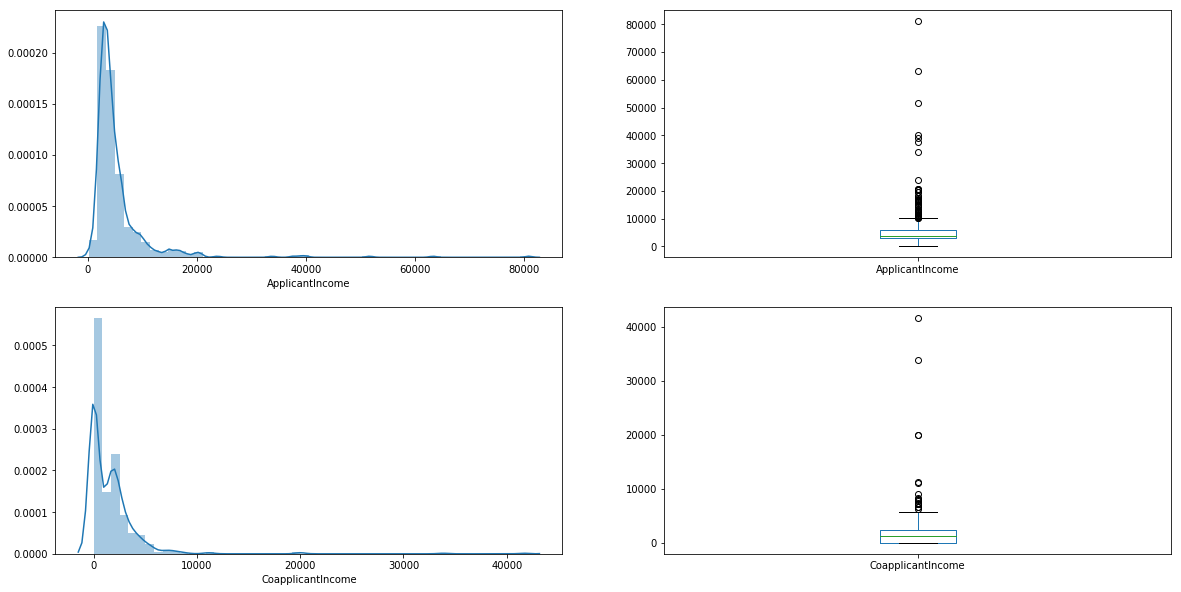

In [15]:
#Visualize numerical variables in the train data
#Let's look at the applicant's income

plt.figure(figsize=(20, 10)) 
plt.subplot(221) 
sns.distplot(df_train['ApplicantIncome']); 
plt.subplot(222) 
df_train['ApplicantIncome'].plot.box() 
plt.subplot(223) 
sns.distplot(df_train['CoapplicantIncome']); 
plt.subplot(224) 
df_train['CoapplicantIncome'].plot.box() 
plt.show()

####  <span style="color:blue"> Note 6: Inferences about the distribution of applicant's income. </span>

- The distribution of both applicant's and coapplicant's income are right-skewed and not normal (we may try to make it normal later as the algorithm works better with normally distributed data).
- The boxplot confirms the presence of outliers in both the distributions which could be attributed to income disparity either due to varying education levels or other anomolies.   
- Majority of coapplicant’s income ranges from 0 to 5000 whereas applicant's income is between the range of 0 to 12000. 



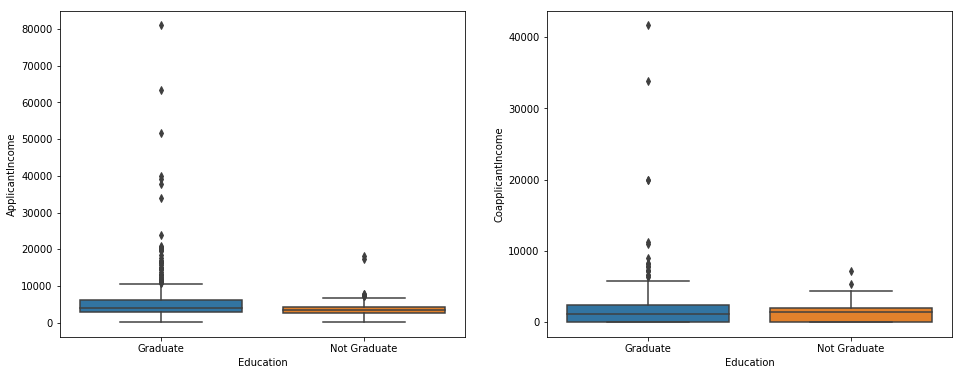

In [16]:
# Let's segregate applicant's income by education
plt.figure(figsize=(16, 6)) 
plt.subplot(121)

sns.boxplot(y="ApplicantIncome", x="Education", data=df_train) 
plt.subplot(122) 
sns.boxplot(y="CoapplicantIncome", x="Education", data=df_train)
plt.show()

####  <span style="color:blue"> Note 8: Outliers in the distribution of applicant's/coapplicant's income. </span>
 We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers. 

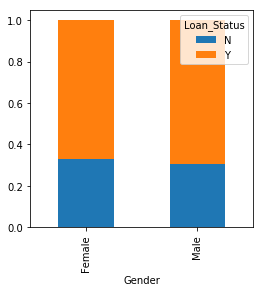

In [17]:
#Bivariate Analysis
#In this section, we will assess correlation between independent and target variable
Gender=pd.crosstab(df_train['Gender'],df_train['Loan_Status']) 
Gender.div(Gender.sum(1) , axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

####  <span style="color:blue"> Note 9: Gender vs Loan_Status. </span>
It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.



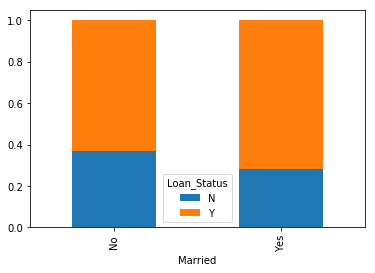

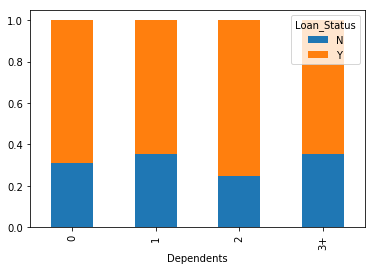

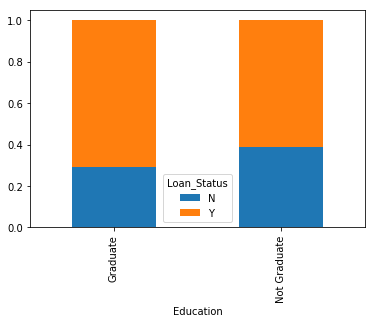

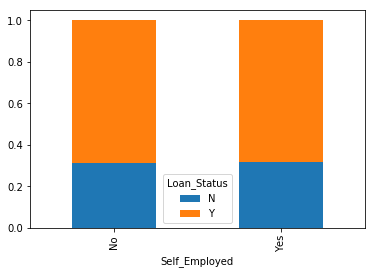

In [18]:
#visualize the remaining categorical variables vs target variable.

#create a table with counts from each of the following category

Married=pd.crosstab(df_train['Married'],df_train['Loan_Status']) 
Dependents=pd.crosstab(df_train['Dependents'],df_train['Loan_Status']) 
Education=pd.crosstab(df_train['Education'],df_train['Loan_Status']) 
Self_Employed=pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status']) 


#Normalize the entries and plot
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

####  <span style="color:blue"> Note 10: Categorical variables vs Loan_Status. </span>  

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.


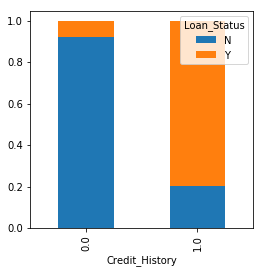

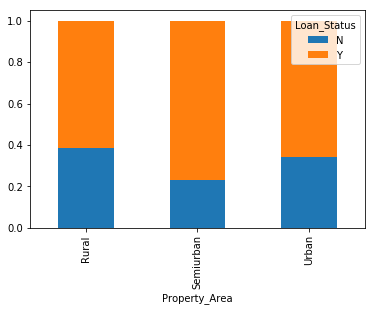

In [19]:
Credit_History=pd.crosstab(df_train['Credit_History'],df_train['Loan_Status']) 
Property_Area=pd.crosstab(df_train['Property_Area'],df_train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

####  <span style="color:blue"> Note 11: Other Categorical variables vs Loan_Status. </span>  

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Text(0, 0.5, 'Percentage')

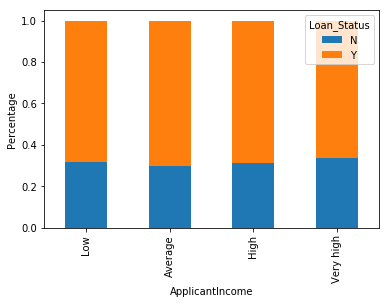

In [20]:
# Numerical Variables vs Target Variables
# Plotting Applicant's income and LOan Status normalized bar plot

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df_train['Income_bin']=pd.cut(df_train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(df_train['Income_bin'],df_train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

####  <span style="color:blue"> Note 13: Applicant income vs Loan_Status. </span>  

- It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis (#1 about Salary) in which we assumed that if the applicant income is high the chances of loan approval will also be high.

Text(0, 0.5, 'Percentage')

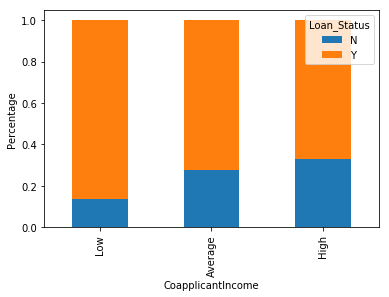

In [21]:
# Plotting Coapplicant's income and Loan Status normalized bar plot

bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
df_train['Coapplicant_Income_bin']=pd.cut(df_train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(df_train['Coapplicant_Income_bin'],df_train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

####  <span style="color:blue"> Note 14: Coapplicant income vs Loan_Status. </span>  

- It shows that if coapplicant’s income is less the chances of loan approval are high which doesn't look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 

Text(0, 0.5, 'Percentage')

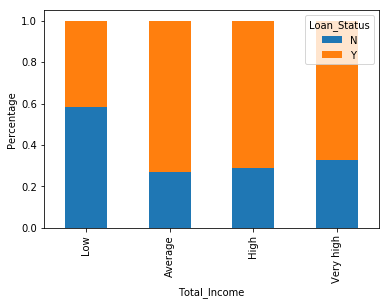

In [22]:
#Let us combine the Applicant Income and Coapplicant Income to see its effect on the Loan_Status.

df_train['Total_Income']=df_train['ApplicantIncome']+ df_train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df_train['Total_Income_bin']=pd.cut(df_train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df_train['Total_Income_bin'],df_train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')

####  <span style="color:blue"> Note 15: Combined income vs Loan_Status. </span>  

- We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.
- Impact of income kind of neutralizes on the decision once the combined income hits the threshold of average income. 

Text(0, 0.5, 'Percentage')

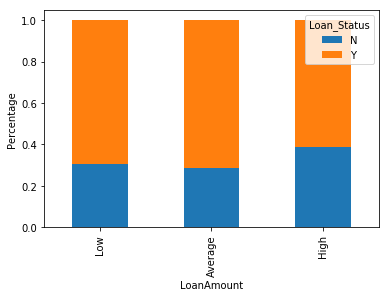

In [23]:
#Let’s visualize the Loan amount variable.

bins=[0,100,200,700] 
group=['Low','Average','High'] 
df_train['LoanAmount_bin']=pd.cut(df_train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(df_train['LoanAmount_bin'], df_train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')

####  <span style="color:blue"> Note 16: Loan Amount vs Loan_Status. </span>  

- It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.


In [24]:
# Clean up time: Let's drop the bins that we created for exploration purposes.
df_train=df_train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)


In [25]:
# We will turn categorical variables into numerical values

df_train['Dependents'].replace('3+', 3,inplace=True) 
df_test['Dependents'].replace('3+', 3,inplace=True) 
df_train['Loan_Status'].replace('N', 0,inplace=True) 
df_train['Loan_Status'].replace('Y', 1,inplace=True)

####  <span style="color:blue"> Note 17: Categorical Variables to numerical data values. </span> 

We made few quick fixes here and will take care of the other variables later in the process.  
1. Replaced 3+ in dependents variable to 3 to make it a numerical variable.  
2. Replaced N with 0 and Y with 1 in Loan_Status.

Text(0.5, 1.0, 'data.corr')

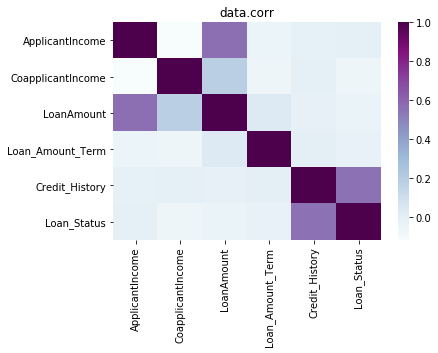

In [26]:
sns.heatmap(df_train.corr(), cmap = "BuPu")
plt.title("data.corr")

####  <span style="color:blue"> Note 18: Correlated features. </span> 

We see that the most correlated variables are (ApplicantIncome with LoanAmount) and (Credit_History with Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [27]:
# Missing value Imputation

df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

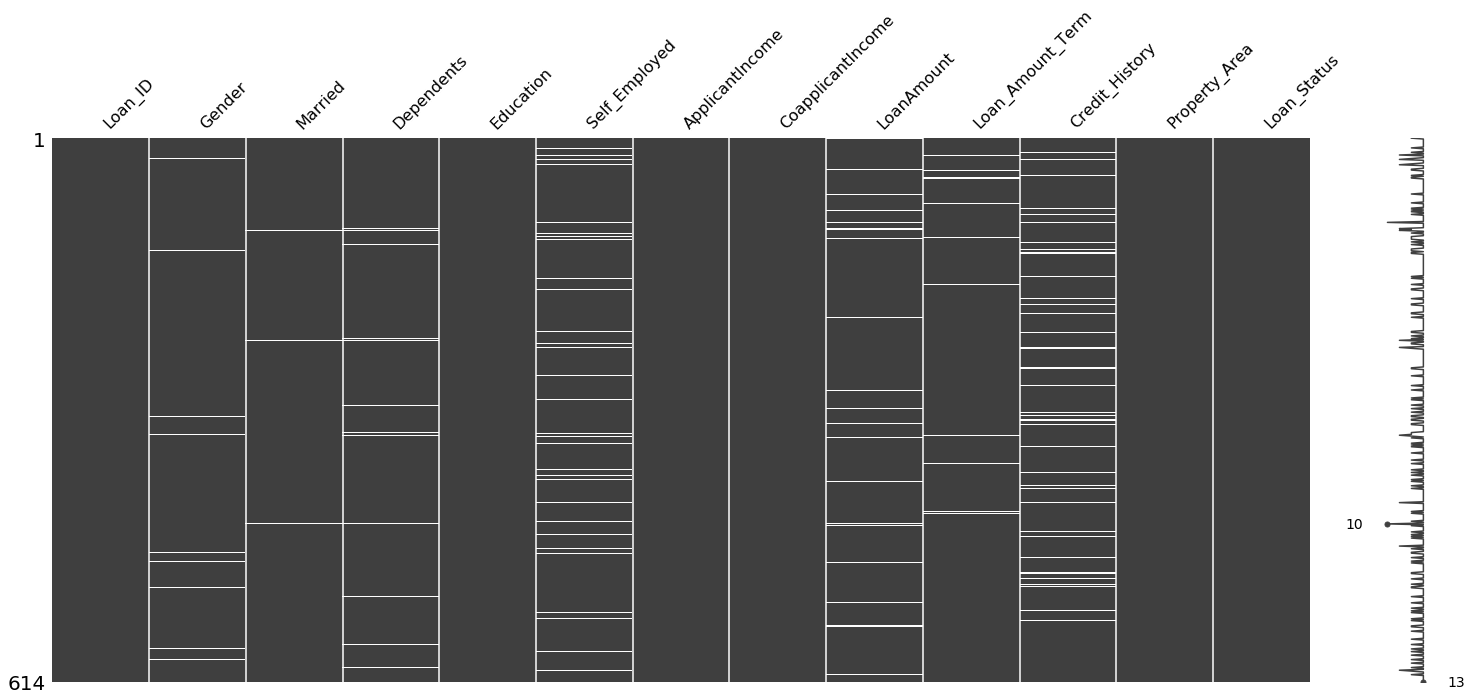

In [28]:
ms.matrix(df_train)

####  <span style="color:blue"> Note 19: Missing Values. </span> 

We see that there are 7 variables with missing values. Let's adopt the following strategy to impute missing values.

- For numerical variables: impute using mean or median
- For categorical variables: impute using mode

In [29]:
# Impute missing values in the following categorical variables with mode

df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True) 
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True) 
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) 
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) 
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [30]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
# Impute missing values in the Loan_Amount_Term with mode = 360 since it occurs most frequently

df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

# Impute missing values in the LoanAmount with median since means will not be  a good choice due to outliers

df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True) 


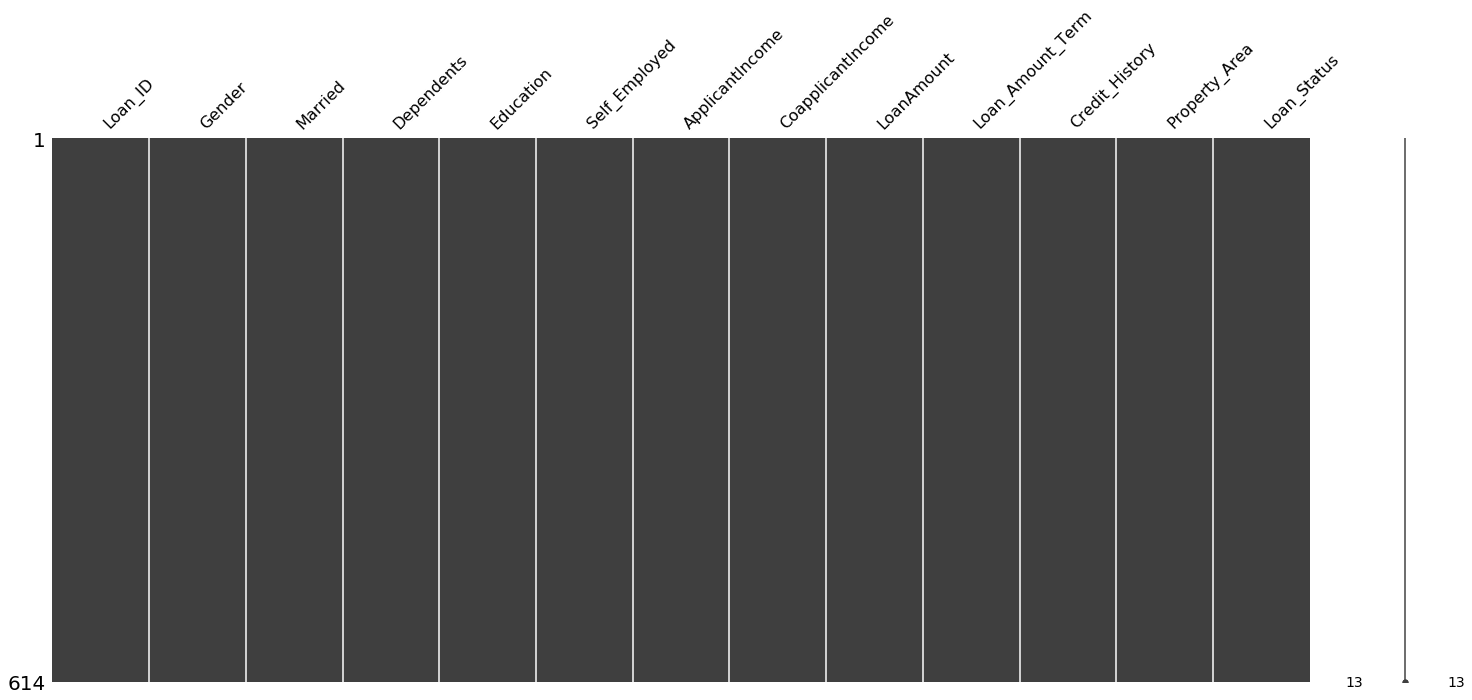

In [32]:
# Verify if all the missing values are filled in the training data

ms.matrix(df_train)

In [33]:
# We must repeat the same steps for the testing data as well for missing values. 
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True) 
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True) 
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True) 
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True) 
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace=True) 

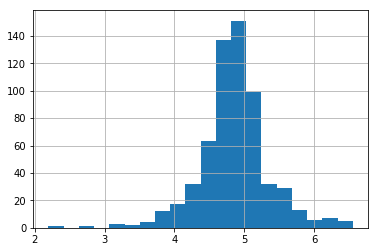

In [34]:
#Outliers:We apply log transformation as it does not affect the smaller values much, but reduces the larger values. 


df_train['LoanAmount_log'] = np.log(df_train['LoanAmount']) 
df_train['LoanAmount_log'].hist(bins=20) 
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

### Step 4: Feature Engineering 

**Part 1**: In this step, we will convert categorical features to dummy variables using pandas! Otherwise some of our machine learning algorithm won't be able to directly take in those features as inputs. 

**Part II**: Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

- *Total Income*: As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
- *EMI*: EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
- *Balance Income*: This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


In [35]:
#Drop Loan_ID variable as it has not effect on the outcome

df_train=df_train.drop('Loan_ID',axis=1) 
df_test=df_test.drop('Loan_ID',axis=1)

In [36]:
X = df_train.drop('Loan_Status', axis = 1) #Sklearn requires the target variable in a separate dataset.
y = df_train.Loan_Status

In [37]:
# Create dummy variables to convert categorical variables into numerical
X=pd.get_dummies(X) 
df_train=pd.get_dummies(df_train) 
df_test=pd.get_dummies(df_test)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_3               614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Ar

In [39]:
#Verify to make sure that all the variables in the data are numerical
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_3               614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Ar

In [40]:
#Create a feature Total Income

df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome'] 
df_test['Total_Income']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']

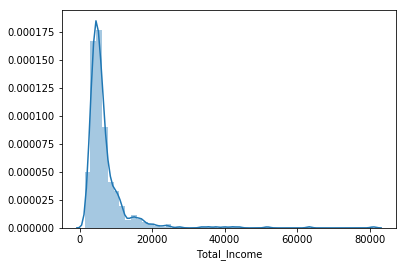

In [41]:
#Distribution of Total income
sns.distplot(df_train['Total_Income'])

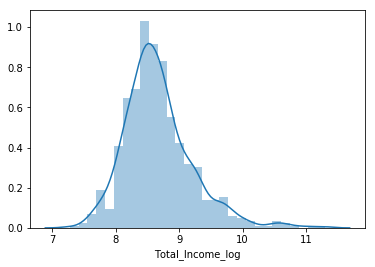

In [42]:
#Take a log to turn the Total income distribution into normal distribution

df_train["Total_Income_log"] = np.log(df_train["Total_Income"])
df_test["Total_Income_log"] = np.log(df_test["Total_Income"])
sns.distplot(df_train['Total_Income_log']);

In [43]:
#Create a feature EMI.
df_train['EMI']=df_train['LoanAmount']*1000/df_train['Loan_Amount_Term'] # Multiply by 1000 to get the actual value of EMI
df_test['EMI']=df_test['LoanAmount']*1000/df_test['Loan_Amount_Term']

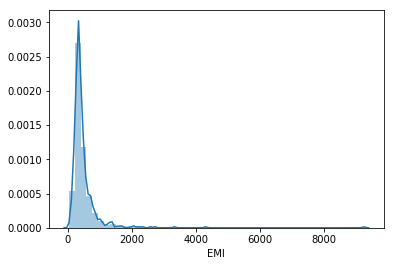

In [44]:
#Distribution of EMI
sns.distplot(df_train['EMI']);

In [45]:
# Create a feature Balance Income

df_train['Balance Income']=df_train['Total_Income']- df_train['EMI']  
df_test['Balance Income']=df_test['Total_Income'] - df_test['EMI']

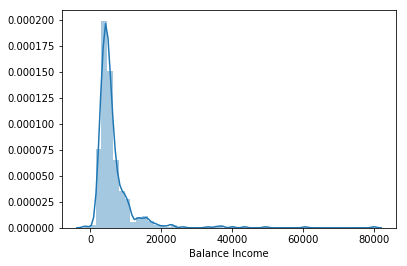

In [46]:
#Distribution of Balance Income
sns.distplot(df_train['Balance Income']);

In [47]:
#Let us now drop the variables which we used to create these new features. 

df_train=df_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
df_test=df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

### Step 5: Select the Model

In this section, we will apply logistic regression model to our dataset two times 
1. After just part I of feature engineering 
2. The other one that incorporates both part I and part II. 


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_3               614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Ar

In [49]:
# Logistic Regression after Part I of Feature engineering
x_train, x_v, y_train, y_v = train_test_split(X,y, test_size = 0.3, random_state = 22)
model = LogisticRegression() 
model.fit(x_train, y_train)
#predict the Loan_Status for validation set.
pred_v = model.predict(x_v)


In [50]:
# Logistic Regression after Part II of Feature engineering
X2 = df_train.drop("Loan_Status", axis= 1)
y = df_train.Loan_Status
X2 = pd.get_dummies(X2)
x_train, x2_v, y_train, y_v = train_test_split(X2,y, test_size =0.3, random_state = 22)
model = LogisticRegression() 
model.fit(x_train, y_train)
#predict the Loan_Status for validation set.
pred2_v = model.predict(x2_v)




In [51]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
Credit_History             614 non-null float64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_3               614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
Total_Income               614 non-null float64
Total_Income_log           614 non-null float64
EMI          

### Step 6: Evaluation
In this step, we will check accuracy score, precision, recall, f1-score using clasification report for both the models.

In [52]:
#Calculate Logistic Regression accuracy with part I of feature engineering
print(accuracy_score(y_v,pred_v))
print(classification_report(y_v,pred_v))
print(confusion_matrix(y_v, pred_v))


0.8486486486486486
              precision    recall  f1-score   support

           0       0.93      0.50      0.65        52
           1       0.83      0.98      0.90       133

   micro avg       0.85      0.85      0.85       185
   macro avg       0.88      0.74      0.78       185
weighted avg       0.86      0.85      0.83       185

[[ 26  26]
 [  2 131]]


In [53]:
#Calculate Logistic Regression accuracy with part I and II of feature engineering
print(accuracy_score(y_v, pred2_v))
print(classification_report(y_v,pred2_v))
print(confusion_matrix(y_v, pred2_v))

0.8378378378378378
              precision    recall  f1-score   support

           0       0.89      0.48      0.62        52
           1       0.83      0.98      0.90       133

   micro avg       0.84      0.84      0.84       185
   macro avg       0.86      0.73      0.76       185
weighted avg       0.85      0.84      0.82       185

[[ 25  27]
 [  3 130]]


In [59]:
sklearn.metrics.precision_score(y_v,pred2_v)

NameError: name 'sklearn' is not defined

### Step 7:Predict on New Cases
Moment of truth - Use your model on the test file!

In [54]:
#Make predictions for the test dataset.

pred_test = model.predict(df_test)

In [55]:
#Import the submission file which we have to submit on the solution checker.

submission=pd.read_csv("C:/Users/18326/Desktop/MachineLearning/Project_LoanPrediction/sample_submission_LoanPrediction.csv")

In [56]:
# fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

submission['Loan_Status']=pred_test 
submission['Loan_ID']=df_test_original['Loan_ID']
#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [57]:
#convert the submission to .csv format 

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:/Users/18326/Desktop/MachineLearning/Project_LoanPrediction/LoanPrediction_logistic2.csv', index = False)

In [58]:
# Quick check with Random Forest 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
m = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
m.fit(x_train, y_train)
predrf_test = m.predict(df_test)

# fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

submission['Loan_Status']=predrf_test 
submission['Loan_ID']=df_test_original['Loan_ID']
#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
#convert the submission to .csv format 

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:/Users/18326/Desktop/MachineLearning/Project_LoanPrediction/LoanPrediction_RF.csv', index = False)
print("The accuracy on the validation data is" , m.score(x_train, y_train))
print(" This seems to be the case of overfitting since the accuracy on the test data actually went down to 75%.")

The accuracy on the validation data is 0.9020979020979021
 This seems to be the case of overfitting since the accuracy on the test data actually went down to 75%.


####  <span style="color:blue"> Note 20: Conclusion. </span> 

- Logistic Regression after feature engineering of adding three additional features is able to predict the response variable of the test data only 77.8% of the time whereasthe accuracy was a little over 78% when we did not add additional features. 

####  <span style="color:blue"> Note 21: Next Steps. </span> 

There is a lot that we can still do to improve the model accuracy or make it more stable. 
- We could try other **models** or/and **cross validation** techniques such as stratified k-fold.
- It seems that the **random forest** is overfitting the training set which might be due to high variance. To resolve the issue of high variance, we might look into reducing some input features. 
- Some **features** such as gender, EMI, balance income doesnt seem to have impact on the loan_status.
- We can also make independent vs independent variable **visualizations** to discover some more patterns.
- We can also arrive at the **EMI** using a better formula which may include **interest rates** as well.
